<a href="https://colab.research.google.com/github/Rosalinas/deep-learning/blob/ag%2Fnotas-template/16-clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpretación de Modelos y Transferencia de Conocimiento**

## **Introducción**

¿Qué podemos decir de las predicciones de los Modelos Convolucionales (CNN)?

**Ejemplo**: Si el modelo nos dice que una imagen es un perro Husky, con cierta probabilidad, ¿qué podríamos decir entorno a esa predicción? 
¿Podríamos cuestionar que atributos y que factores influyeron en la etiqueta de esa imagen que se está produciendo?

La respuesta es que hasta este momento no podemos decir algo en este sentido. Solamente podemos afirmar que los modelos multicapa o CNN son:

*   Modelos altamente parametrizados
*   La composición de transformaciones lineales no permite dar una interpretación tan sencilla como lo sería una regresión lineal.
*   Por lo anterior, el resultado del modelo puede percibirse como una “caja negra”, es decir que los resultados sean no interpretables.




Para intentar solucionar esta complicación y ayudar a la interpretación se han desarrollado herramientas como la *arquitectura LIME*. (Ribeiro, Singh y Guestrin, “Why Should I trust You?” Explaining the Predictions of Any Classifier) Adicionalmente, existe investigación muy fuerte para ayudar a hacer estos modelos interpretables.

En este sentido, ¿qué podemos hacer para revisar las predicciones de estos modelos? En general tenemos tres herramientas:

1.   Explorar Filtros
2.   Explorar las salidas de las capas intermedias.
3.   Explorar la activación de una clase particular. Esto se puede hacer grafica meten cuando estamos hablando sobre clasificación.


**1. Explorar Filtros**

  Para explorar filtros podemos generar visualizaciones de la composición del filtro mismo. El problema de esto continúa siendo que la interpretación sigue siendo complicada. 
  
  **Ejemplo 1** : Filtro de 3x3

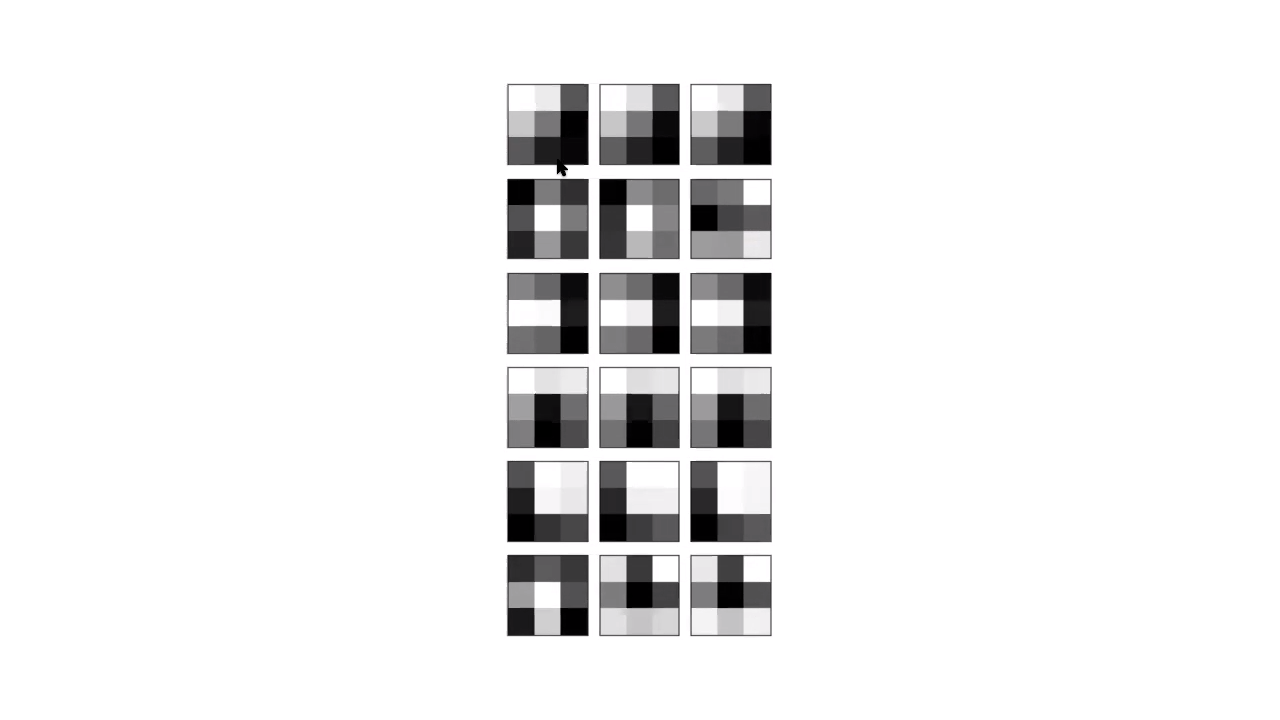

Tratando de discernir lo que sucede en cada uno de ellos. Podría ser que reconoce cierto cambio de colores en una dirección en particular. Aun así, sería difícil como poder interpretar el resultado que estamos observando.

Dado la anterior complicación, para poder explorar estos filtros, lo que vamos a hacer es tratar de buscar la “imagen” que maximiza el valor del filtro aplicado.

**Ejemplo 2:**

Empezamos a observar algunos patrones particulares de la imagen en cada capa que exploramos. En la primera capa podríamos estar observando el color, patrones muy sencillos y características generales.

**Capa 1.**

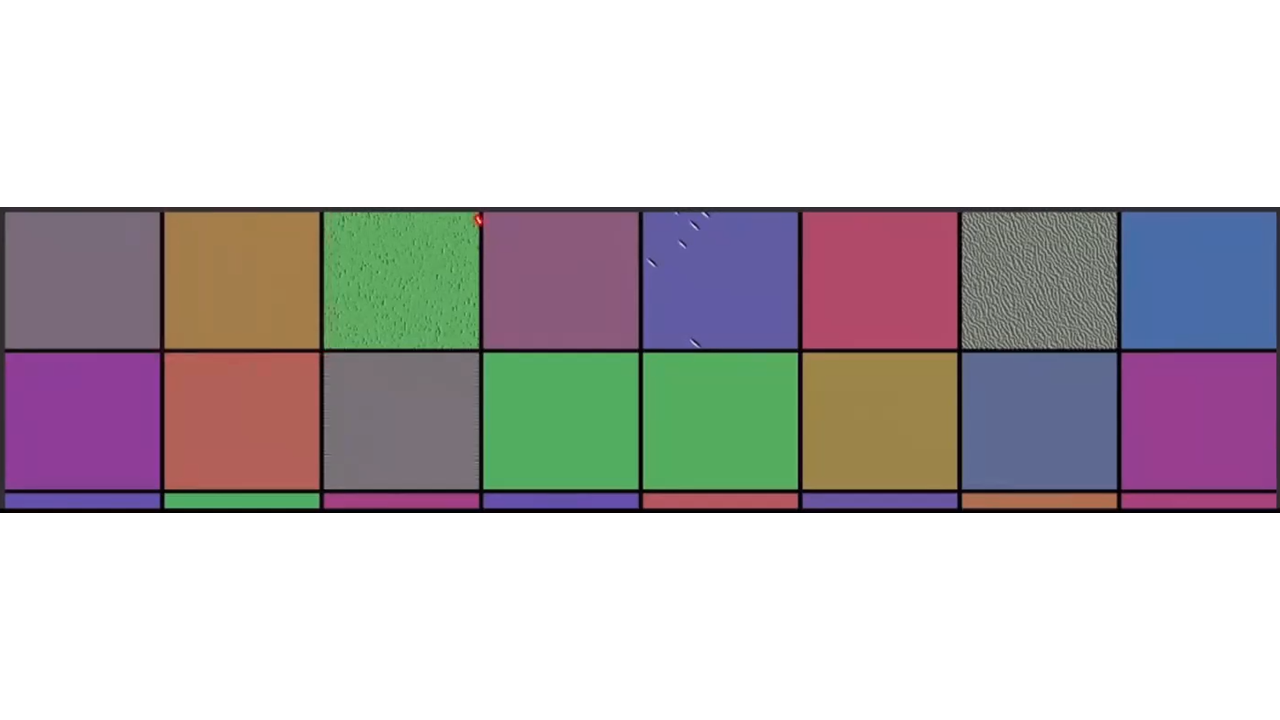



Sin embargo, conforme aumentamos las capas, el modelo va aprendiendo a observar características adicionales como pueden ser cierta composición en el ruido, composición en direcciones horizontales o direcciones diagonales.

**Capa 2.**

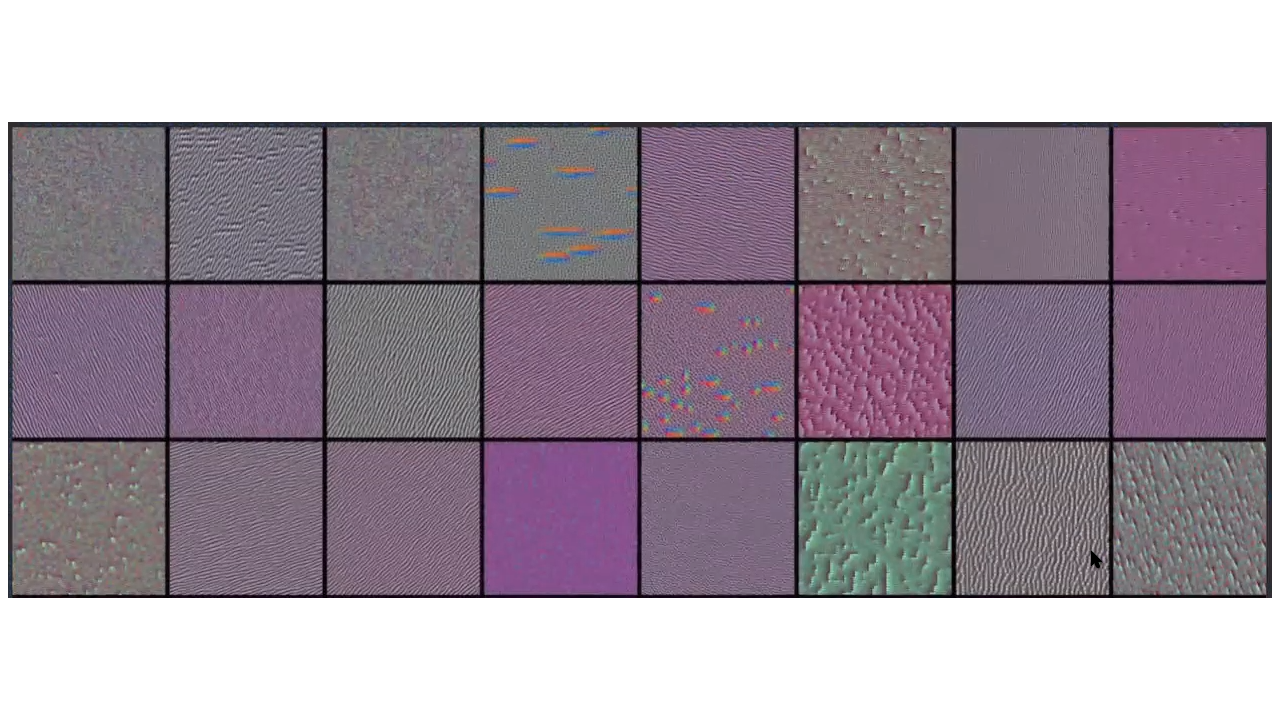

Conforme exploramos capas que son más cercanas a las salidos podremos observar patrones más interesantes, en el sentido de que los filtros se están activando a patrones más abstractos.

**Capa “n”.**

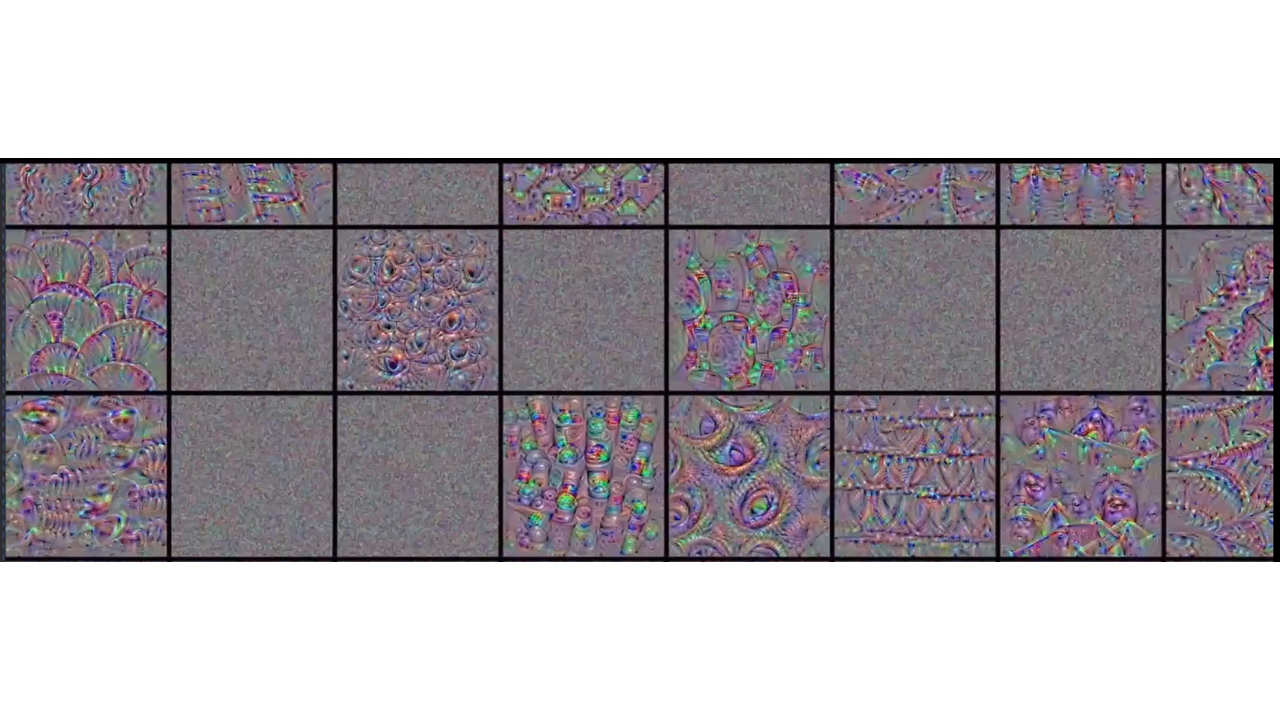

Existe información adicional en Keras consultando ["Visualizing what convnets learn"](https://keras.io/examples/vision/visualizing_what_convnets_learn/).

**2. Explorar las Salidas de las Capas Intermedias**

Podemos hacer revisiones de capas intermedias. En cada capa podemos ir resaltando o mitigando características de la imagen. Con esto, conforme avanzamos en cada capa, el modelo va aprendiendo patrones cada vez más generales.


*   Primero definimos una función de pérdida con activación de filtro.
*   Buscamos en cada una de las capas.
*   Buscamos la imagen que hace que dicho se active lo más posible.
*   Podemos usar descenso en gradiente para revisar que características resaltan más. Se puede consultar información adicional en el post [Grad-CAM](https://keras.io/examples/vision/grad_cam/) de Keras.

Podemos entrenar un modelo y ponerlo en producción para hace predicciones. Dadas nuestras métricas de validación cruzada y métricas de utilizar un conjunto de datos en prueba podemos observar o pretender que tenemos una estimación del error de generalización y estar confiado en las predicciones de ese modelo. Sin embargo, esto puede fallar de manera catastrófica ya que depende de las condiciones de entrenamiento.

Dada esta complicación, ¿cómo podríamos hacer nuestros modelos un poco más robustos?, es decir, ¿Cómo podríamos mejorar sus capacidades predictivas? Una práctica común para mejorar las predicciones en este sentido es el uso de datos sintéticos.

##**Datos Sintéticos (Data Augmentation)**

La idea es sencilla, tienes una imagen. Genera durante el entrenamiento imágenes adicionales relacionadas con la original aplicando ciertas transformaciones para hacer el aprendizaje mucho más robusto. Puede cambiar la saturación de la imagen, cambiar los brillos, cambiar la posición de la imagen y con esto robustecer el conjunto de entrenamiento lo que permite aprender otras características de los datos.

**Ejemplo:**

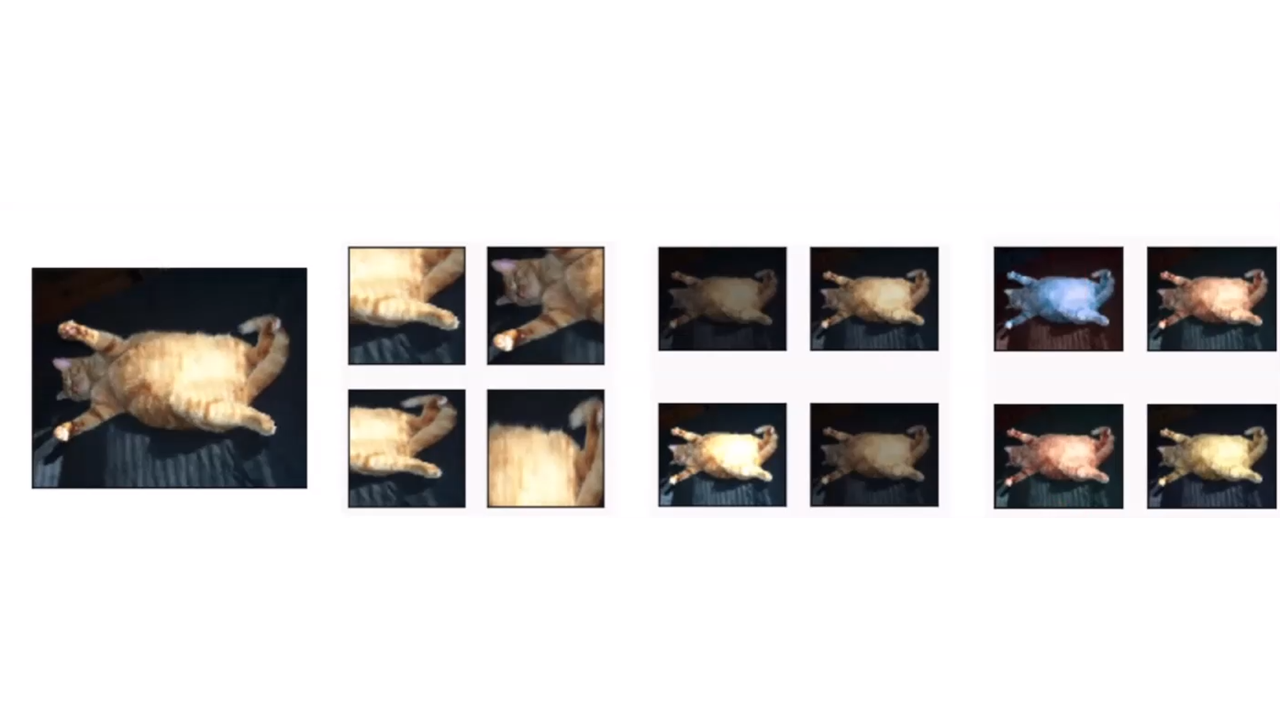

Es decir, podemos definir un conjunto de cambios aleatorios a nuestras imágenes para que durante la etapa de entrenamiento se vayan realizando mientras el algoritmo continúa dicho entrenamiento.

## **Conjunto de Datos para Imagenes**

Hasta el momento hemos visto dos conjuntos de datos para imágenes: Fashion-MNIST e ImageNet. El primero cuenta con 60,000 observaciones y 10 clases distintas, mientras que el segundo tiene 1.2 millones de observaciones y 1,000 clases. Nosotros deberíamos estar en un intermedio entre estas dos opciones.

Idealmente lo que buscamos hacer, es que si ya tenemos datos y modelos que se han aplicado con proyectos de gran escala, es transferir los conocimientos adquiridos en esos conjuntos de datos a nuestra aplicación. Es decir, buscamos realizar una transferencia de aprendizaje.


## **Transferencia de Aprendizaje**

¿Por qué queremos una transferencia de aprendizaje?
En general los procesos de adquisición de datos son costosos, por lo que buscamos utilizar lo que ya se ha aprendido e implementarlo en un conjunto de datos nuevo. Podemos pensar que los modelos de aprendizaje o estos modelos MLP tienen dos componentes en general. 

**Ejemplo:**

El siguiente modelo MLP tiene dos componentes. Un componente que se encarga de extraer los atributos, esto entre las capas “Layer 1” hasta “Layer L-1”. Y una vez que termina de extraer los atributos la capa “Output layer” se encarga de hacer las predicciones conforme a los atributos que fueron extraídos. 

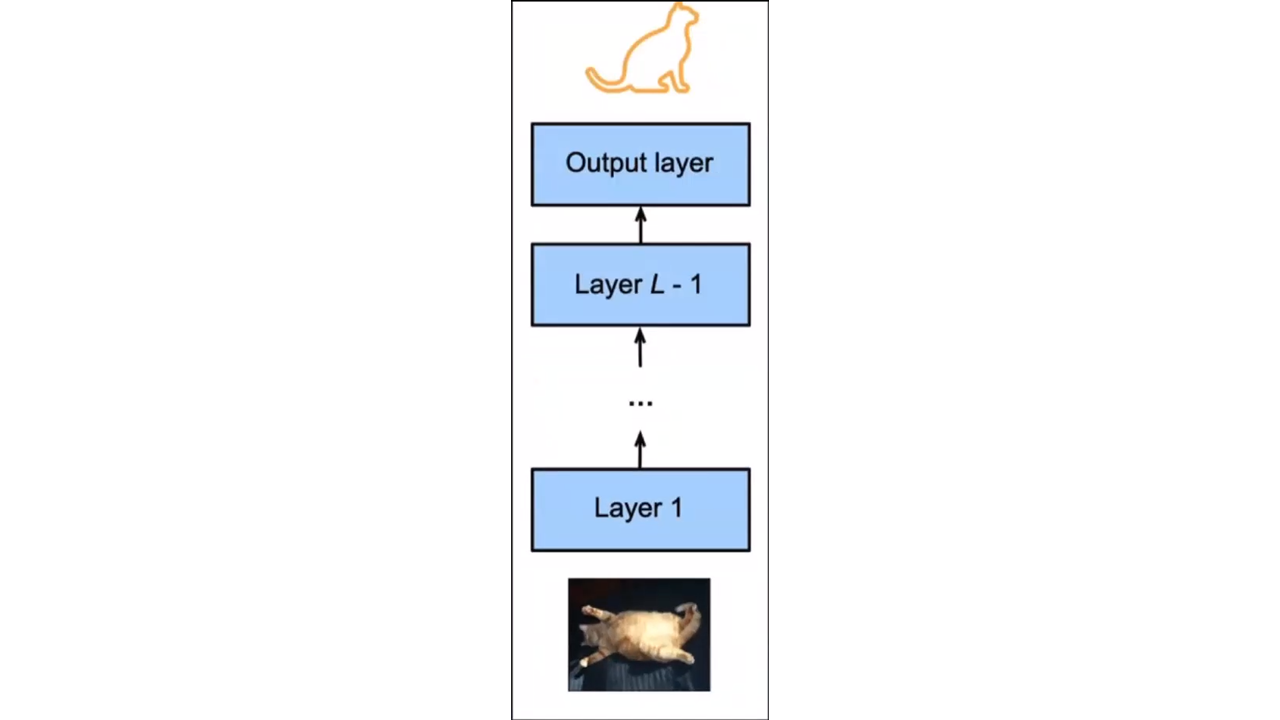

Como hemos aprendido, las capas muy cercanas a las entradas “Layer 1” extraen atributos generales como colores, que son de poca resolución, y conforme vamos aumentando capas, vamos extrayendo atributos más interesantes que nos permiten al final del proceso predecir la imagen de “gato”.

Por esto si nosotros quisiéremos hacer transferencia de conocimiento, o utilizar lo que se aprendió en un modelo, lo que podemos hacer es utilizar un modelo que ya se entrenó, copiarlo, e implementar un modelo nuevo. La característica importante en este proceso es que vamos a fijo los atributos que ya fueron extraídos y por lo tanto no se entrenan, son atributos ya dados. Entonces dentro del nuevo modelo el entrenamiento se va a llevar a cabo únicamente en la última capa. En la figura siguiente sería en “*Output layer – Train from scratch*”.

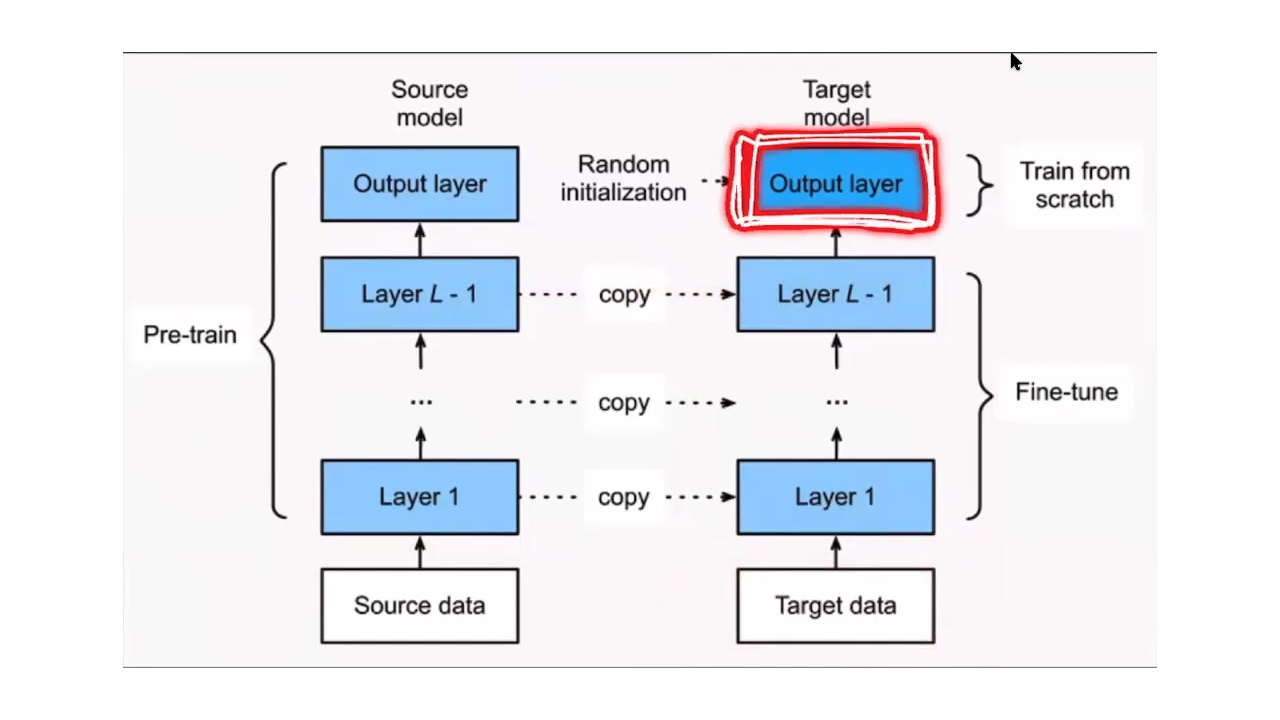

Esto se puede hacer ya que el modelo ya extrajo los atributos que fueron fijados, y únicamente falta entrenar en la ultima capa, para realizar una nueva predicción. En resumen estamos buscando reentrenar nuestro modelo.

**¿Qué necesitamos para reentrenar nuestro modelo?**


**Necesitamos un grado alto de regularización**. Estamos regularizando un modelo con “L-1” capas ocultas, y estamos buscando esta regularización para que se comporte como algo que habíamos regularizado previamente. Esto conlleva tasas de aprendizaje bajas o número de épocas pequeñas. Esto sucede porque partimos que el modelo anterior esta bien inicializado y no queremos perturbar tanto la regularización inicial.

Otra idea es que la regularización de la capa de salida la podemos inicializar de manera aleatoria, o iniciar del estado que tenía anteriormente “Output Layer – Source model” y de ahí permitirle que comience a aprender para llegar a la predicción del nuevo modelo.

¿Qué pasaría si estamos reentrenando la última capa “L-1” pero esa última capa tiene un componente de normalización por bloques?

Una opción es cambiar los componentes de los filtros que estamos aplicando. El post ["Transfer learning and fine tuning"](https://keras.io/guides/transfer_learning/) en Keras tiene información adicional. En resumen, lo que se debe de hacer es no reentrenar la capa que incorpora regularización por bloques.

**Casos de Éxito de Modelos Convolucionales de Transferencia de Conocimientos**

**App “Prisma”**. Esta aplicación permite aplicar filtros distintos, lo cuales fueron aprendidos en modelos anteriores a imágenes en redes sociales. Es decir, crean un filtro que transfiere el estilo de una imagen a otra. Como hemos comentado al largo de la sesión, esto se logra haciendo uso de algo que se aprendió en modelos previos.

## **Transferencia de Estilo**

La idea general es tener una imagen de origen, a la cual le quiero aplicar un estilo y obtener una imagen compuesto por dicho estilo. 

**Ejemplo 1:**

Tomamos la primera figura de la imagen, posteriormente el estilo de la segunda imagen y buscamos aplicar dicho estilo a la primera. De esta manera obtenemos como resultado la imagen de la derecha.

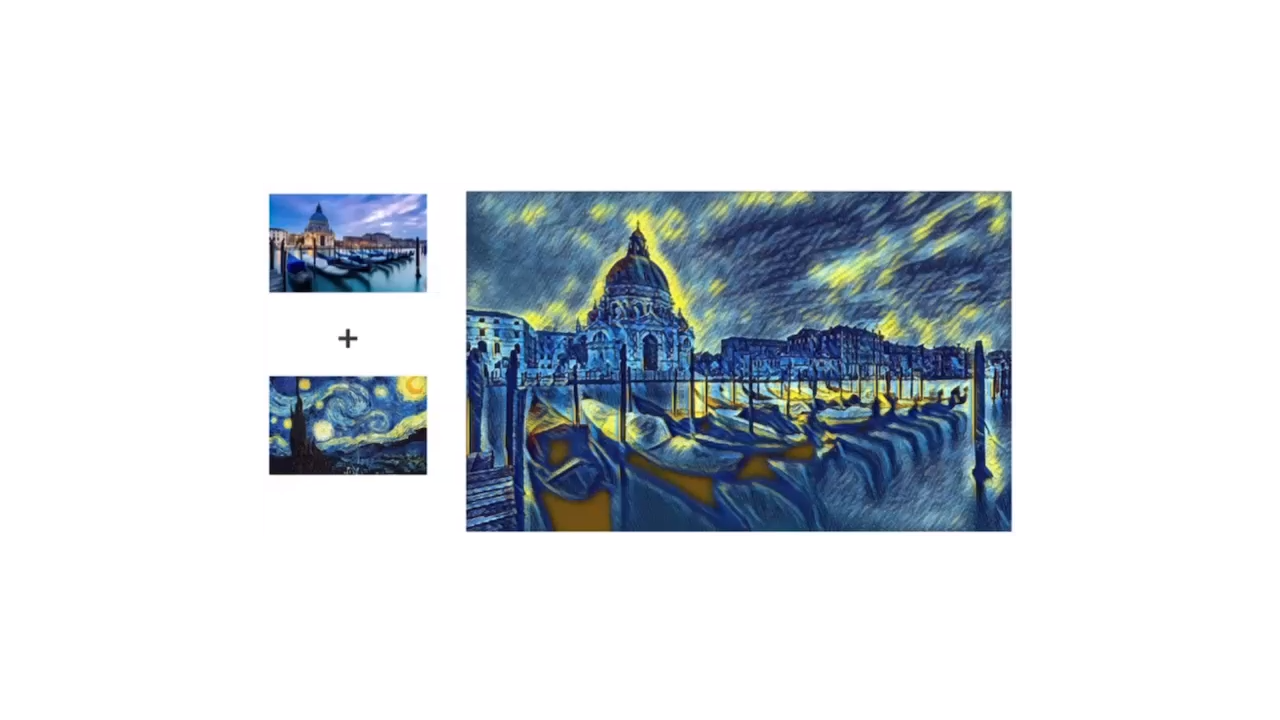

Sin embargo, debemos tener cuidado con:



1.   Tener una función de pérdida que controle el contenido de la imagen original.
2.   Tener una segunda función de pérdida que controle el estilo de la imagen que queremos.
3.   Tener una 3er función de pérdida que controle los elementos de ruido. Es decir, que controle los pixeles cercanos entre sí mantengan cierta relación entre ellos, que no cambien bruscamente y no empecemos a ver variaciones muy altas.


**Ejemplo 2:**

Digamos que tenemos un modelo CNN de tres capas y vamos a aplicar el mismo modelo a cada una de ellas, tanto a la imagen de contenido como a la imagen de estilo. También se lo vamos a aplicar a la imagen que esperamos producir a través de este procedimiento.

Las capas iniciales y las finales se encargan de extraer conocimiento local, como detalles, mientras que las capas intermedias extraen atributos que sean representaciones abstractas de la imagen que estamos alimentando. Es por esto por lo que cuando aplicamos el modelo CNN tanto a la imagen de contenido como a la imagen que estamos generando, estamos midiendo la diferencia en contenido “*Content loss*”.

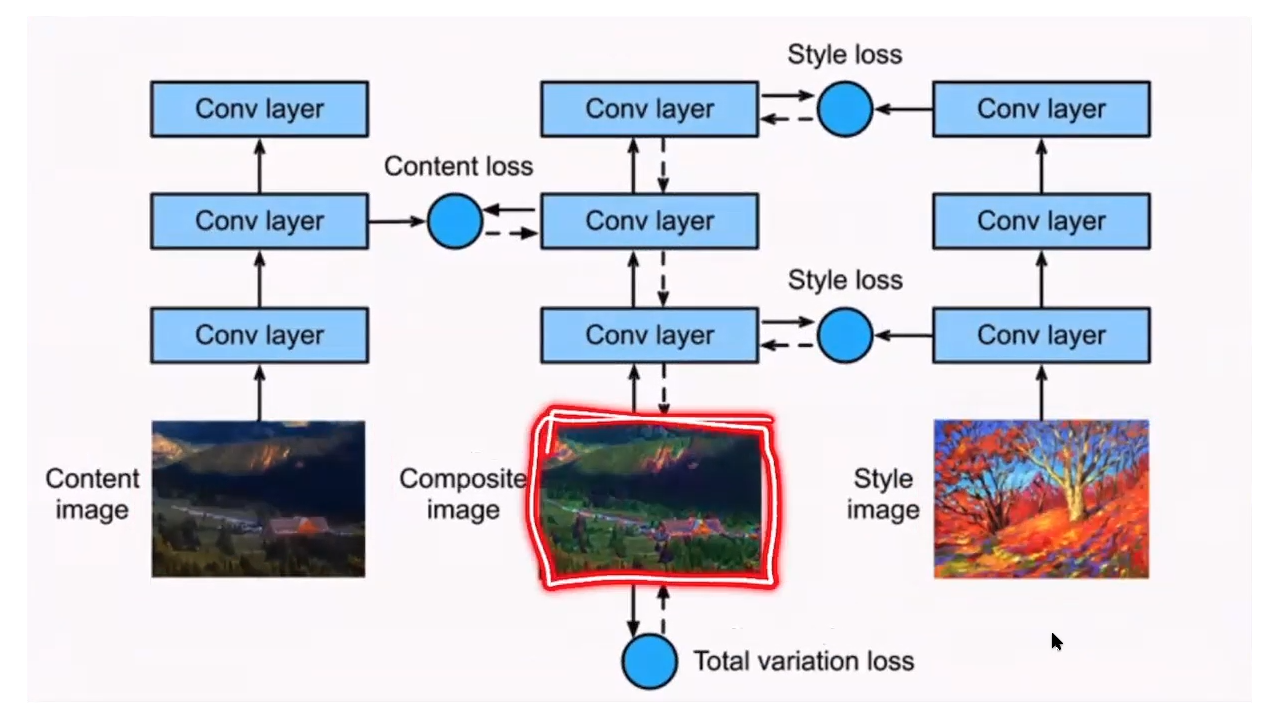

Al final la función objetivo que buscamos minimizar es una combinación lineal de perdidas cuadráticas de distintos componentes, el contenido, el estilo y la variación total del error. Y con esto podemos explorar la transferencia de estilos entre imágenes. Información adicional en este sentido se puede encontrar en la biblioteca de Keras en [Neural Style Transfer](https://keras.io/examples/generative/neural_style_transfer/).

Por lo tanto la ecuación a minimizar es:

$$ w_{1}*l_{contenido}^2 + w_{2}*l_{estilo}^2 + w_{3}*l_{variacion \ total}^2 $$